In [5]:
!pip install PyWavelets

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.3 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.5/4.3 MB 837.5 kB/s eta 0:00:05
   ------- -------------------------------- 0.8/4.3 MB 907.1 kB/s eta 0:00:04
   --------- ------------------------------ 1.0/4.3 MB 898.8 kB/s eta 0:00:04
   --------- ------------------------------ 1.0/4.3 MB 898.8 kB/s eta 0:00:04
   ------------ --------------------------- 1.3/4.3 MB 907.1 kB/s eta 0:00:04
   -------------- ------------------------- 1.6/4.3 MB 942.3 kB/s eta 0:00:03
   ----------------- ---------------------- 1.8/4.3 MB 931.8 kB/s eta 0:00:03
   ------------------- -------------------- 2.1/4.3 MB 946.9 kB/s eta 0:00:03
   -------------------

DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pywt
import pywt.data

In [7]:
def dwt_transform(image):
  titles = ['Approximation', ' Horizontal detail',
            'Vertical detail', 'Diagonal detail']

  coeffs2 = pywt.dwt2(image, 'bior1.3')
  LL, (LH, HL, HH) = coeffs2
  fig = plt.figure(figsize=(12, 3))
  for i, a in enumerate([LL, LH, HL, HH]):
      ax = fig.add_subplot(1, 4, i + 1)
      ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
      ax.set_title(titles[i], fontsize=10)
      ax.set_xticks([])
      ax.set_yticks([])

  fig.tight_layout()
  plt.show()

  return LL, LH, HL, HH

In [8]:
def inverse_dwt(LL, LH, HL, HH):
  return pywt.idwt2((LL, (LH, HL, HH)), 'bior1.3')

In [9]:
def main(path):
  image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  LL, LH, HL, HH = dwt_transform(image)
  inverse_dwt_image = inverse_dwt(LL, LH, HL, HH)
  print("Image created using Inverse DWT")
  plt.imshow(inverse_dwt_image, cmap='gray')
  plt.show()

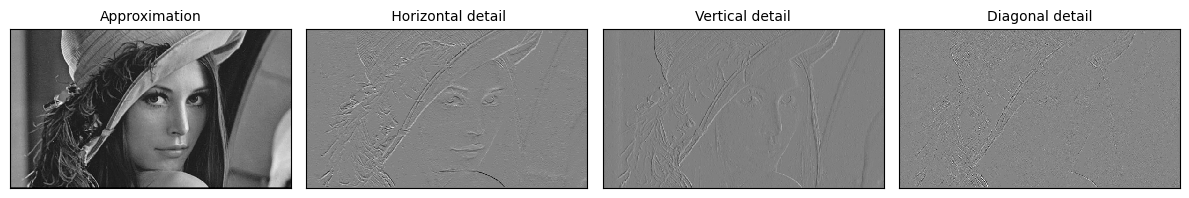

Image created using Inverse DWT


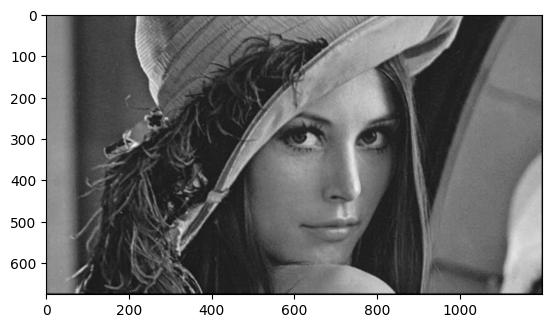

In [10]:
image_path = 'lenna.jpeg'
main(image_path)